# Funciones de correlación
Comenzamos importando las siguientes paqueterias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from collections import Counter
import random
import seaborn as sns

## Construcción de las circunferencias
Como queremos graficar puntos aleatorios de un círculo, primero debemos recordar como se grafica una circunferencia:

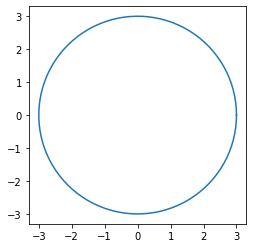

In [2]:
theta = np.linspace(0, 2*np.pi, 100) #angulo
r = 3 #radio
x = r*np.cos(theta)
y = r*np.sin(theta)
#Graficamos
figure, axes = plt.subplots(1)
axes.plot(x, y)
axes.set_aspect(1)
plt.show()

Ahora, sólo queremos  elegir algunos puntos aleatorios de la circunferencia, y lo hacemos de la siguiente forma:

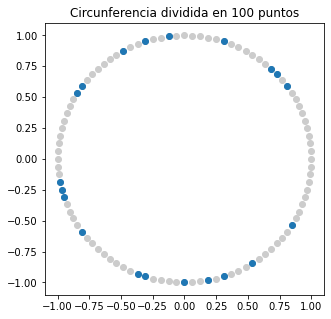

In [3]:
randProba = lambda a: a/sum(a)
npoints = 100# puntos en los que se dividirá cada círculo
r = 1 # radio del círculo

#Graficamos circunferencia gris
plt.figure(figsize=(5,5))
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)
x = r * np.cos(t)
y = r * np.sin(t)
plt.scatter(x, y, c='0.8')

#Graficamos puntos aleatorios de la circunferencia
n = 20 # puntos aleatorios que elegiremos del círculo
t = np.linspace(0, 2*np.pi, npoints, endpoint=False)[np.random.choice(range(npoints), n, replace=False, p=randProba(np.random.random(npoints)))]
x = r * np.cos(t)
y = r * np.sin(t)
plt.title('Circunferencia dividida en 100 puntos')
plt.scatter(x, y)

### Le agregamos perturbaciones 

## Puntos en diferentes círculos aleatorios
A continuación programamos una función a la cual le entregamos los siguientes datos: cantidad de circulos, puntos en los que dividiremos cada círculo, canidad de esos puntos que eligiremos de cada círculo, radio de los círculos, y rango de los centros. A partir de estos datos, nos entrega una 2 listas que son las coordenadas x, y las coordenadas y de cada punto que sigue la distribución de pertenecer a algún circulo con una perturbación del 10% del radio.

In [4]:
# Elegimos cajas cuadradas entre [0, R]
np.random.seed(431)

def Puntos_circulos(ncentros, ncircle_points, radio, tcaja,p):
    #Definimos dos arreglos de ceros en los que guardaremos en uno las coordenadas x y en otro las y de los puntos que aleatorios de nuestros círculos
    ran_centros = np.random.rand(ncentros, 2)*tcaja
    x_1, y_1 = ran_centros.T[0], ran_centros.T[1] 
    
    ran_pcircles = np.random.uniform(0, 2*np.pi, ncircle_points)
    pts = 0
    circulo = []
    for i in range(ncentros):
        cx = []
        cy = []
        for j in ran_pcircles:
            r = radio + random.uniform(-radio*p,radio*p) #Pertubación
            c_1 = x_1[i] + r*np.cos(j)
            c_2 = y_1[i] + r*np.sin(j)
            #Como los centros de los círculos pueden estar en la orilla, 
            #muchos puntos del cículo deseado se pueden salir de área a estudiar deseada, 
            #por lo que sólo guardamos los que quedan dentro
            if (0 < c_1 < tcaja) & (0 < c_2 < tcaja):
                cx.append(c_1)
                cy.append(c_2)
                pts+= 1
        # en caso de querer graficar un circulo en particular 
        circulo.append(list(zip(cx, cy)) )
    print('total puntos', pts)
    return circulo

In [72]:
circulo = Puntos_circulos(170, 20, 15, 100,0.01)

total puntos 2907


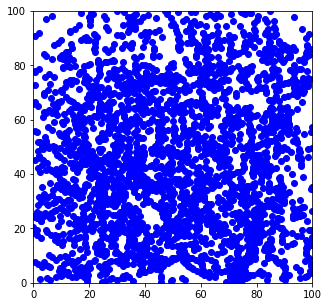

In [73]:
plt.figure(figsize=(5,5))
plt.xlim(0, 100)
plt.ylim(0, 100)

#graficar todos
for cir in circulo: 
    plt.scatter(*zip(*cir), color='b')

In [74]:
def DD(circulo):
    # Save them all in one array
    all_data = []
    for i, c in enumerate(circulo):
        for _, j in enumerate(c):
            all_data.append(j)
    return all_data

## Distribución aleatoria (RR)

In [75]:
rr = np.random.rand(int(len(DD(circulo))), 2)*100

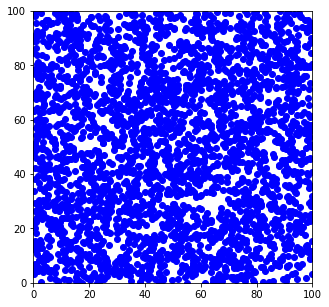

In [76]:
plt.figure(figsize=(5,5))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.scatter(rr.T[0], rr.T[1], color='b')

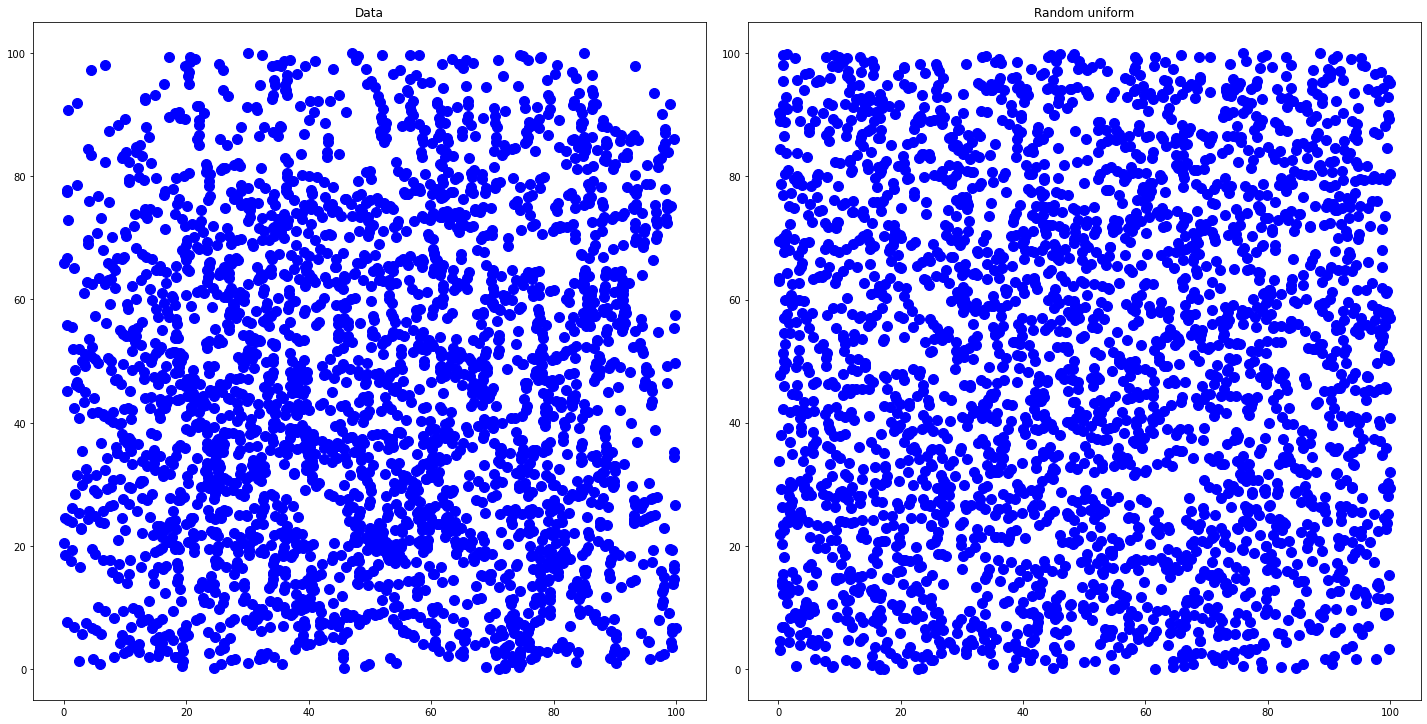

In [77]:
fig_cosmo, axes_cosmo = plt.subplots(figsize=(20,10), nrows=1, ncols=2)
plt.tight_layout()

axes_cosmo[0].set_title('Data')
for cir in circulo: 
    axes_cosmo[0].scatter(*zip(*cir), color='b', s=100)

axes_cosmo[1].set_title('Random uniform')
axes_cosmo[1].scatter(rr.T[0], rr.T[1], color='b', s=100)

# Distancia
Para los siguientes calculos usamos la siguiente función para calcular distancias entre dos puntos:
$$d(\bar{x},\bar{y})=\sqrt{(x_1-x_2)^2+(y_1-y_2)^2}$$

In [78]:
#Creamos una función que nos de las distancias entre dos puntos
def distancia(x1, x2):
    diff_x = (x1[0] - x2[0])**2
    diff_y = (x1[1] - x2[1])**2
    length = np.sqrt(diff_x+diff_y)
    return length

A continuación programamos una función que calcula las distancias entre todos los puntos, sin repetir.

In [79]:
def comp_all_distances(sample):
    dist_random = []
    for i, _ in enumerate(sample):
        g = partial(distancia, sample[i])
        d = list(map(g, sample[i+1:]))
        dist_random.extend(d)
    return dist_random

A continuación, calcullamos todas las ditancias de los puntos aleatorios y posteriormente de los DD

In [80]:
distance_rr = comp_all_distances(rr)

In [81]:
distance_dd = comp_all_distances(DD(circulo))

## Histogramas

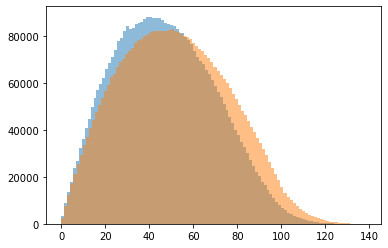

In [82]:
plt.figure()
plt.hist(distance_dd, bins=100, alpha=0.5)
plt.hist(distance_rr, bins=100, alpha=0.5)

plt.show()

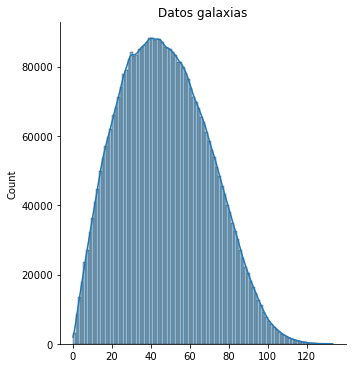

In [83]:
sns.displot(distance_dd, bins=100, kde=True).set(title='Datos galaxias');

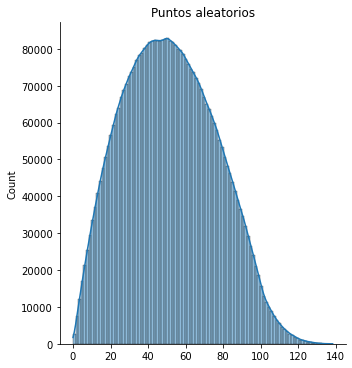

In [84]:
sns.displot(distance_rr, bins=100, kde=True).set(title='Puntos aleatorios');

In [85]:
sorted_DD = sorted(distance_dd)
sorted_RR= sorted(distance_rr)

Ahora, la forma más sencilla de estimar la función de correlación de dos puntos $\xi(r)$ :
$$\xi(r)=\frac{\hat{DD}}{\hat{RR}}-1 $$
donde DD es la distribución de distancias de pares de galaxias dentro de un conjunto de datos, y RR la distribución de distancias de un conjunto aleatorio. Si $\xi(r)=0$ la distribución de galaxias en los datos también es aleatoria; $\xi(r)>0$ existe una sobredensidad y, contrariamente, para $\xi(r)<0$ una infradensidad.

In [86]:
rrandom = [round(r, 0) for r in  distance_rr]
rcount = Counter(rrandom)
sorted_RR = sorted(rcount.items()) #Convertimos los diccionarios en listas de duplas (categoria, cantidad_de_distancias)

In [87]:
ddata = [round(r, 0) for r in  distance_dd]
dcount = Counter(ddata )
sorted_DD = sorted(dcount.items())

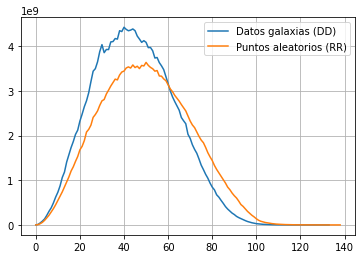

In [88]:
xDD = [x[0] for x in sorted_DD]
yDD = [x[1]**2 for x in sorted_DD]
xRR = [x[0] for x in sorted_RR]
yRR = [x[1]**2 for x in sorted_RR]
plt.plot(xDD, yDD, label='Datos galaxias (DD)')
plt.plot(xRR, yRR, label='Puntos aleatorios (RR)')
plt.grid()
plt.legend()

In [89]:
s = []
for i in range(140):
    s.append((dcount[i] - rcount[i]))

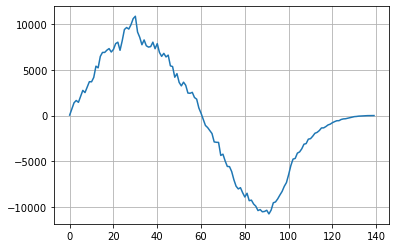

In [90]:
plt.plot(s)
plt.grid()

## Función de correlación

In [91]:
ξ_graf = []
for i in range(130):
    ξ_graf.append(abs(dcount[i]/rcount[i])-1)

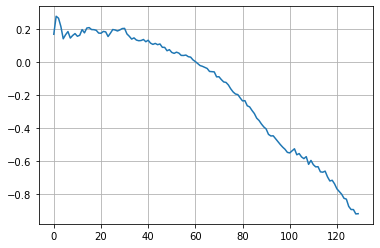

In [92]:
plt.plot(ξ_graf)
plt.grid()